# DBSCAN Project  

## The Data


Source: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

Margarida G. M. S. Cardoso, margarida.cardoso '@' iscte.pt, ISCTE-IUL, Lisbon, Portugal


Data Set Information:

Provide all relevant information about your data set.


Attribute Information:

    1) FRESH: annual spending (m.u.) on fresh products (Continuous);
    2) MILK: annual spending (m.u.) on milk products (Continuous);
    3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
    4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
    5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
    6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
    7) CHANNEL: customers  Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
    8) REGION: customers  Region Lisnon, Oporto or Other (Nominal)
 

Relevant Papers:

Cardoso, Margarida G.M.S. (2013). Logical discriminant models â€“ Chapter 8 in Quantitative Modeling in Marketing and Management Edited by Luiz Moutinho and Kun-Huang Huarng. World Scientific. p. 223-253. ISBN 978-9814407717

Jean-Patrick Baudry, Margarida Cardoso, Gilles Celeux, Maria JosÃ© Amorim, Ana Sousa Ferreira (2012). Enhancing the selection of a model-based clustering with external qualitative variables. RESEARCH REPORT NÂ° 8124, October 2012, Project-Team SELECT. INRIA Saclay - ÃŽle-de-France, Projet select, UniversitÃ© Paris-Sud 11



-----

In [2]:
from ucimlrepo import fetch_ucirepo
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# fetch dataset 
wholesale_customers = fetch_ucirepo(id=292) 
  
# data (as pandas dataframes) 
X = wholesale_customers.data.features 
y = wholesale_customers.data.targets 
  
# variable information 
print(wholesale_customers.variables) 

               name     role         type demographic description units  \
0           Channel  Feature  Categorical        None        None  None   
1            Region   Target  Categorical        None        None  None   
2             Fresh  Feature      Integer        None        None  None   
3              Milk  Feature      Integer        None        None  None   
4           Grocery  Feature      Integer        None        None  None   
5            Frozen  Feature      Integer        None        None  None   
6  Detergents_Paper  Feature      Integer        None        None  None   
7        Delicassen  Feature      Integer        None        None  None   

  missing_values  
0             no  
1             no  
2             no  
3             no  
4             no  
5             no  
6             no  
7             no  


**COMPLETE THE REQUIRED TASKS:**


In [10]:
df = pd.merge(wholesale_customers.data.features, wholesale_customers.data.targets, left_index=True, right_index=True)

## EDA

**TASK: Create a scatterplot showing the relation between MILK and GROCERY spending, colored by Channel column.**

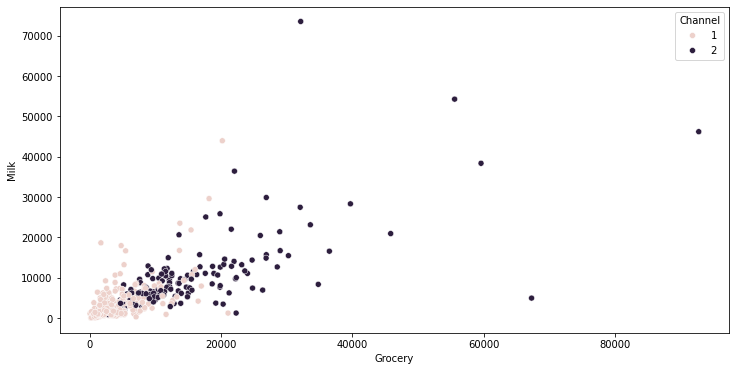

In [16]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Grocery", y="Milk", hue="Channel", data=df)
plt.show()

**TASK: Use seaborn to create a histogram of MILK spending, colored by Channel. Can you figure out how to use seaborn to "stack" the channels, instead of have them overlap?**

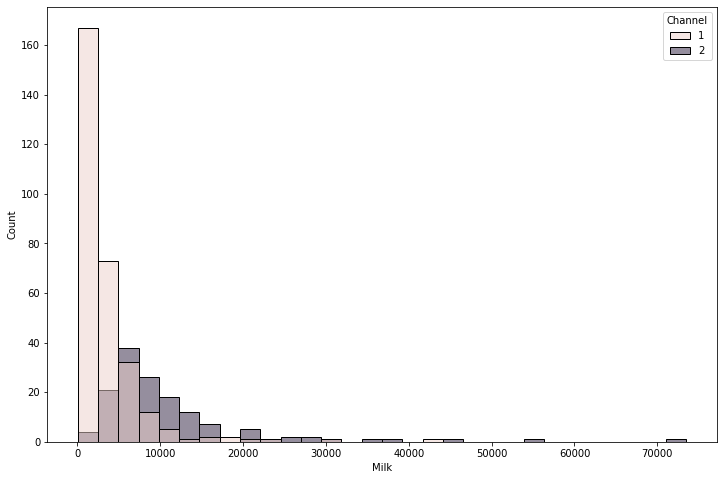

In [15]:
plt.figure(figsize=(12,8))
sns.histplot(data=df, x="Milk", hue="Channel", bins=30)
plt.show()

**TASK: Create an annotated clustermap of the correlations between spending on different cateogires.**

<Figure size 864x432 with 0 Axes>

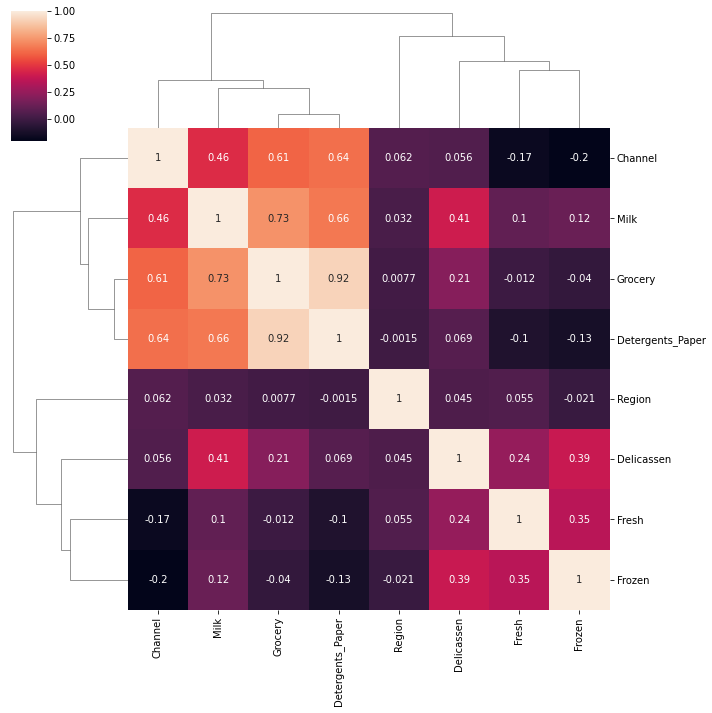

In [20]:
corr_map = df.corr()

plt.figure(figsize=(12,6))
sns.clustermap(corr_map, annot=True)
plt.show()

**TASK: Create a PairPlot of the dataframe, colored by Region.**

<Figure size 864x576 with 0 Axes>

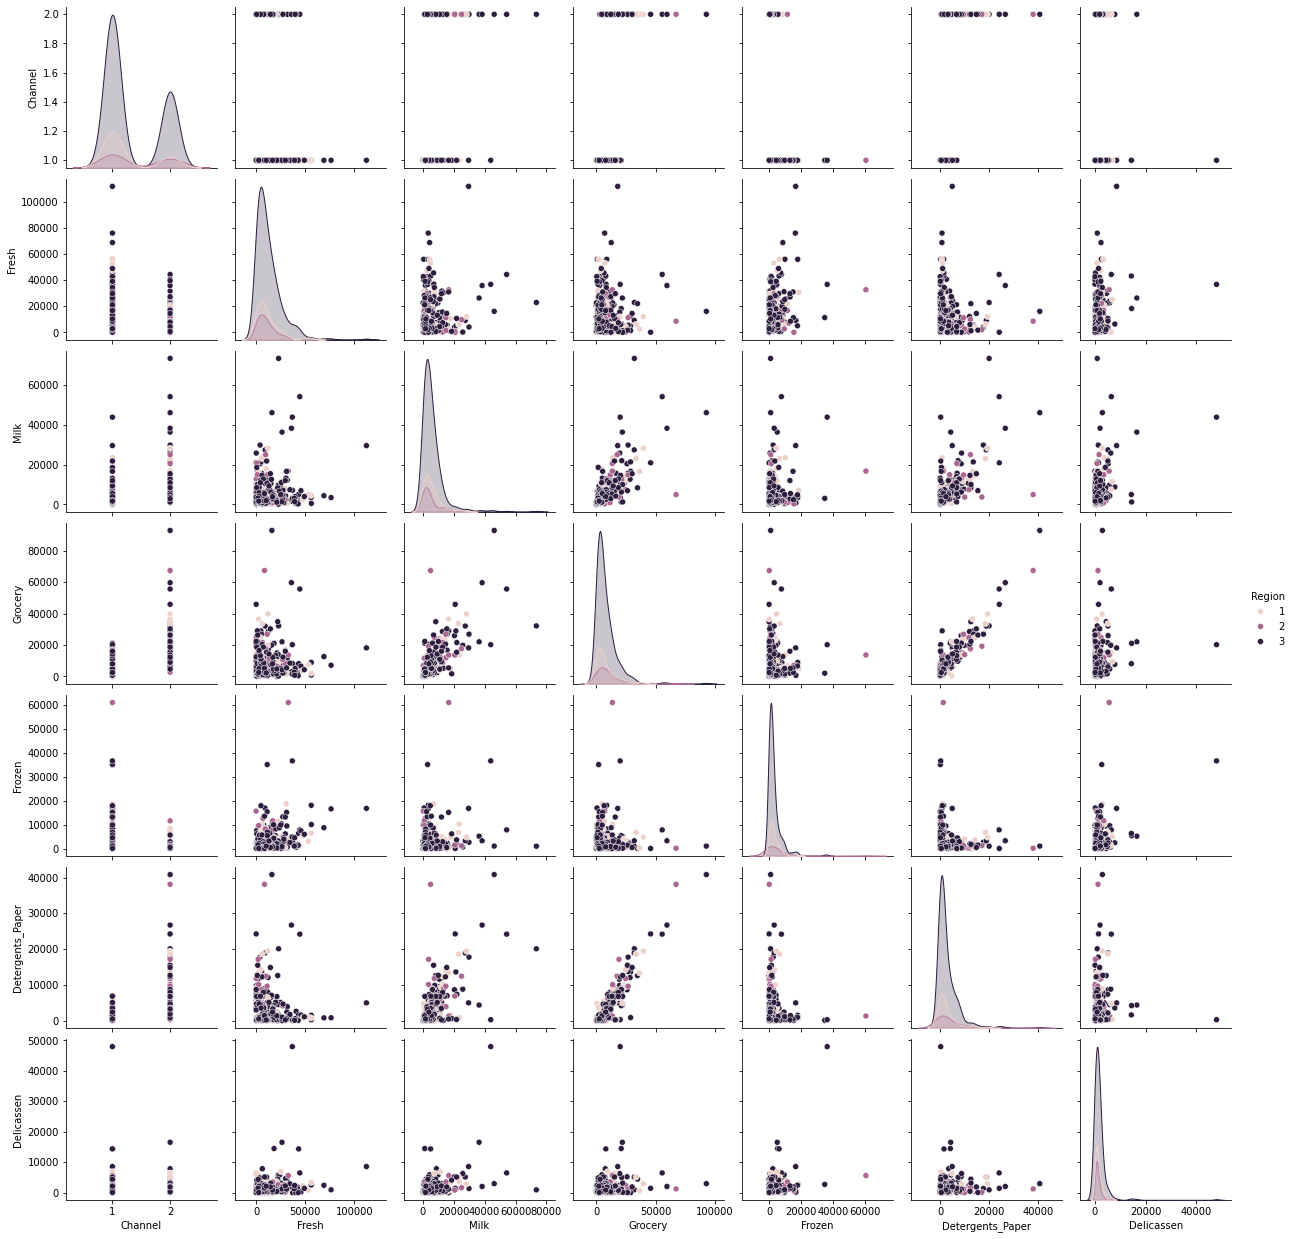

In [21]:
plt.figure(figsize=(12,8))
sns.pairplot(data=df, hue='Region')
plt.show()

## DBSCAN

**TASK: Since the values of the features are in different orders of magnitude, let's scale the data. Use StandardScaler to scale the data.**

In [30]:
standard_scaler = StandardScaler()
numerical_features = df.drop(columns=['Region', 'Channel']).columns

df[numerical_features] = standard_scaler.fit_transform(df[numerical_features])

df.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region
0,2,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,3
1,2,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,3
2,2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,3
3,1,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,3
4,2,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,3


**TASK: Use DBSCAN and a for loop to create a variety of models testing different epsilon values. Set min_samples equal to 2 times the number of features. During the loop, keep track of and log the percentage of points that are outliers. For reference the solutions notebooks uses the following range of epsilon values for testing:**

    np.linspace(0.001,3,50)

In [34]:
features = df.drop(columns=['Region'])
min_samples = len(features.columns) * 2

outlier_percent = []

for eps in np.linspace(0.001, 3, 50):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(features)

    outliers = clusters.tolist().count(-1)
    percent_outliers = outliers * 100 / len(clusters)

    outlier_percent.append([eps, percent_outliers])
    print(f'Epsilon: {eps:.2f}, Outlier%: {percent_outliers:.2f}%')

Epsilon: 0.00, Outlier%: 100.00%
Epsilon: 0.06, Outlier%: 100.00%
Epsilon: 0.12, Outlier%: 100.00%
Epsilon: 0.18, Outlier%: 100.00%
Epsilon: 0.25, Outlier%: 100.00%
Epsilon: 0.31, Outlier%: 86.59%
Epsilon: 0.37, Outlier%: 75.23%
Epsilon: 0.43, Outlier%: 67.05%
Epsilon: 0.49, Outlier%: 62.95%
Epsilon: 0.55, Outlier%: 57.27%
Epsilon: 0.61, Outlier%: 49.09%
Epsilon: 0.67, Outlier%: 40.23%
Epsilon: 0.74, Outlier%: 32.95%
Epsilon: 0.80, Outlier%: 27.95%
Epsilon: 0.86, Outlier%: 23.18%
Epsilon: 0.92, Outlier%: 20.23%
Epsilon: 0.98, Outlier%: 17.05%
Epsilon: 1.04, Outlier%: 15.00%
Epsilon: 1.10, Outlier%: 12.95%
Epsilon: 1.16, Outlier%: 11.82%
Epsilon: 1.23, Outlier%: 10.91%
Epsilon: 1.29, Outlier%: 9.77%
Epsilon: 1.35, Outlier%: 8.18%
Epsilon: 1.41, Outlier%: 7.95%
Epsilon: 1.47, Outlier%: 7.95%
Epsilon: 1.53, Outlier%: 7.50%
Epsilon: 1.59, Outlier%: 6.82%
Epsilon: 1.65, Outlier%: 6.14%
Epsilon: 1.71, Outlier%: 5.45%
Epsilon: 1.78, Outlier%: 5.45%
Epsilon: 1.84, Outlier%: 4.77%
Epsilon: 1.90

**TASK: Create a line plot of the percentage of outlier points versus the epsilon value choice.**

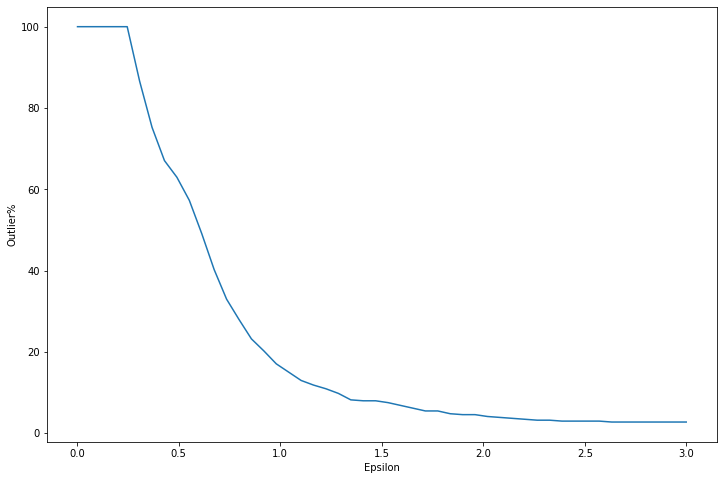

In [39]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=pd.DataFrame(outlier_percent, columns=['Epsilon', 'Outlier%']), x='Epsilon', y='Outlier%')
plt.show()

## DBSCAN with Chosen Epsilon

**TASK: Based on the plot created in the previous task, retrain a DBSCAN model with a reasonable epsilon value. Note: For reference, the solutions use eps=2.**

In [40]:
dbscan = DBSCAN(eps=2, min_samples=min_samples) #I have no idea what a reasonable epsilon value means so I'll just follow what the instructions say
dbscan_labels = dbscan.fit_predict(features)

**TASK: Create a scatterplot of Milk vs Grocery, colored by the discovered labels of the DBSCAN model.**

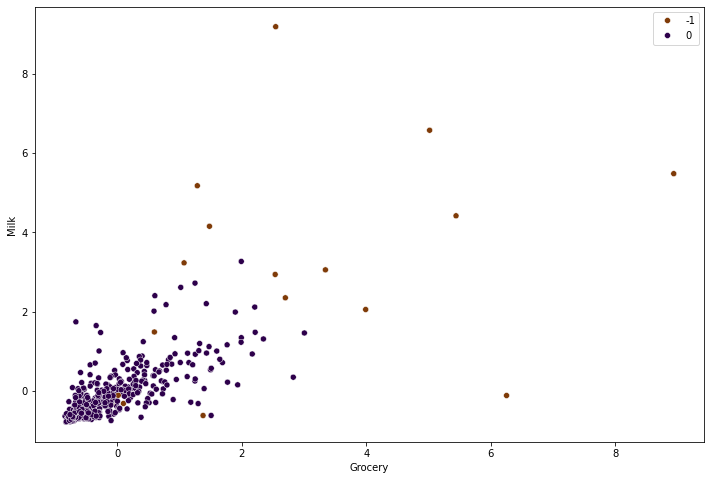

In [48]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Grocery', y='Milk', hue=dbscan_labels, palette='PuOr')
plt.show()

**TASK: Create a scatterplot of Milk vs. Detergents Paper colored by the labels.**

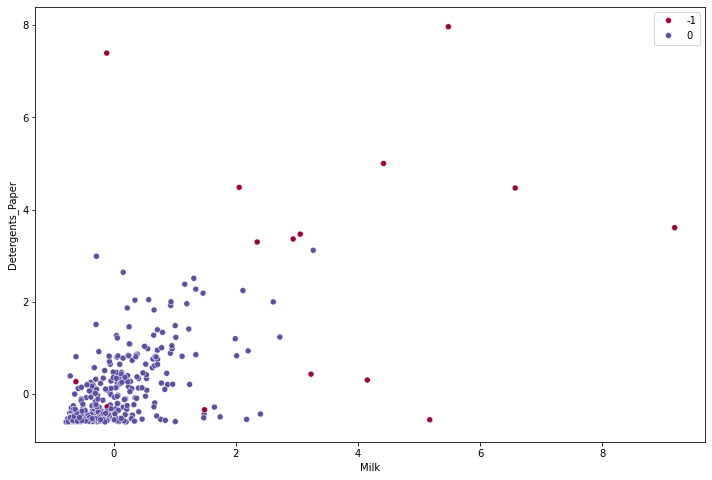

In [62]:
plt.figure(figsize=(12, 8))

sns.scatterplot(data=df, x='Milk', y='Detergents_Paper', hue=dbscan_labels, palette='Spectral')
plt.show()

**TASK: Create a new column on the original dataframe called "Labels" consisting of the DBSCAN labels.**

In [67]:
cluster_means = df.groupby('Labels').mean()
outlier_means = df[df['Labels'] == -1].mean()

**TASK: Compare the statistical mean of the clusters and outliers for the spending amounts on the categories.**

In [69]:
print("Cluster Means:")
cluster_means

Cluster Means:


,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region
Labels,,,,,,,,
-1,1.555556,1.551598,2.682846,2.555108,1.984278,2.310002,2.252325,2.666667
0,1.312796,-0.066182,-0.114434,-0.108986,-0.084637,-0.098531,-0.096071,2.537915


In [70]:
print("\nOutlier Means:")
outlier_means


Outlier Means:


Channel             1.555556
Fresh               1.551598
Milk                2.682846
Grocery             2.555108
Frozen              1.984278
Detergents_Paper    2.310002
Delicassen          2.252325
Region              2.666667
Labels             -1.000000
dtype: float64

**TASK: Normalize the dataframe from the previous task using MinMaxScaler so the spending means go from 0-1 and create a heatmap of the values.**

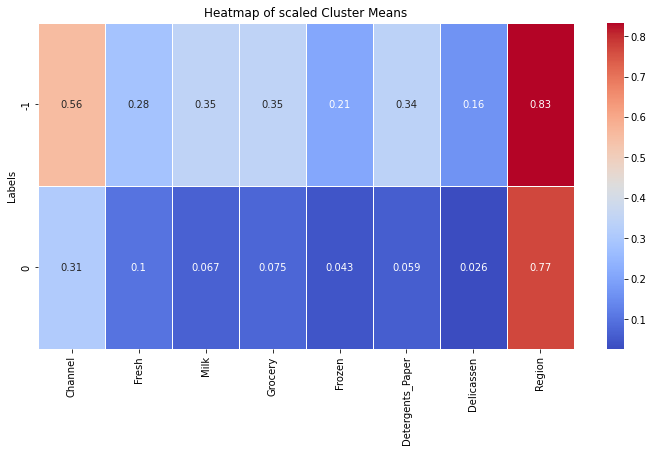

In [89]:
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df.drop(columns=['Labels'])), columns=df.columns[:-1])

df_normalized['Labels'] = df['Labels']

plt.figure(figsize=(12, 6))

sns.heatmap(cluster_means, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of scaled Cluster Means')

plt.show()

**TASK: Create another heatmap similar to the one above, but with the outliers removed**

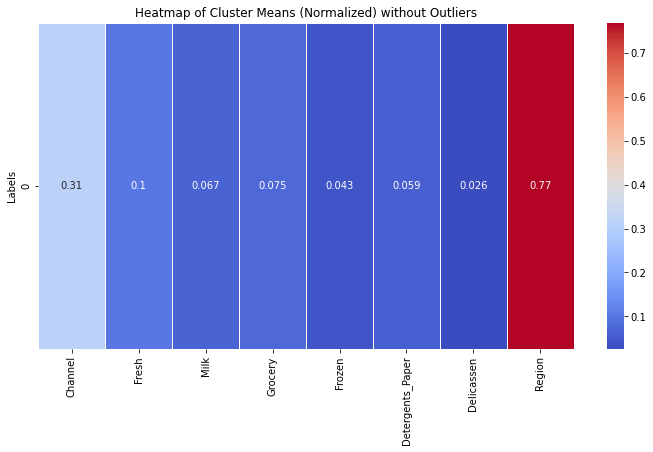

In [92]:
df_normalized_no_outliers = df_normalized[df_normalized['Labels'] != -1]
cluster_means_no_outliers = df_normalized_no_outliers.groupby('Labels').mean()

plt.figure(figsize=(12, 6))

sns.heatmap(cluster_means_no_outliers, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Cluster Means (Normalized) without Outliers')

plt.show()

**TASK: What spending category were the two clusters mode different in?**

In [95]:
cluster_0_means = cluster_means.loc[0]
cluster_1_means = cluster_means.loc[-1]

differences = (cluster_0_means - cluster_1_means).abs()

max_diff_category = differences.idxmax()
max_diff_value = differences.max()

print(f"The spending category where the two clusters differ the most is '{max_diff_category}' with a difference of {max_diff_value:.2f}.")

The spending category where the two clusters differ the most is 'Detergents_Paper' with a difference of 0.28.
